In [1]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns


In [2]:
df = pd.read_csv("Taxi_Trip_Data.csv", sep=",")

C:\Users\Guillaume dse\AppData\Local\Temp\ipykernel_22248\2511857008.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Taxi_Trip_Data.csv", sep=",")


In [3]:
df.sort_values("total_amount").head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
472264,2.0,01/03/2020 07:29:51 PM,01/05/2020 12:28:15 PM,1.0,8.27,1.0,N,186,152,3.0,-1238.0,-1.0,-0.5,0.0,0.0,-0.3,-1242.3,-2.5
3946865,2.0,01/21/2020 01:10:40 AM,01/21/2020 01:10:49 AM,4.0,0.00,5.0,N,42,42,4.0,-730.0,0.0,0.0,0.0,0.0,-0.3,-730.3,0.0
1026423,2.0,01/06/2020 10:23:17 PM,01/06/2020 10:23:30 PM,1.0,0.00,5.0,N,65,65,2.0,-500.0,0.0,0.0,0.0,0.0,-0.3,-500.3,0.0
2730449,2.0,01/15/2020 05:00:34 AM,01/15/2020 05:04:39 AM,1.0,0.00,5.0,N,133,133,3.0,-400.0,0.0,0.0,0.0,0.0,-0.3,-400.3,0.0
5238475,2.0,01/26/2020 09:47:20 PM,01/26/2020 09:48:25 PM,1.0,0.02,5.0,N,186,186,3.0,-330.0,0.0,-0.5,0.0,0.0,-0.3,-333.3,-2.5


In [4]:
df.shape

(6500000, 18)

In [5]:
df.isna().sum()

VendorID                 79229
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          79229
trip_distance                0
RatecodeID               79229
store_and_fwd_flag       79229
PULocationID                 0
DOLocationID                 0
payment_type             79229
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
dtype: int64

In [6]:
df.isna().sum().sum()

396145

In [7]:
df_cleaned = df.dropna()
df_cleaned = df_cleaned[df_cleaned["total_amount"] > 0]
del df
df_cleaned.shape


(6399314, 18)

In [8]:
dfTest = df_cleaned[:50000]

In [9]:
#dfTest.loc[:, "tpep_dropoff_datetime"] = dfTest["tpep_dropoff_datetime"].apply(lambda x: x.replace("AM", ""))
#dfTest.loc[:, "tpep_pickup_datetime"] = dfTest["tpep_pickup_datetime"].apply(lambda x: x.replace("AM", ""))

#dfTest.loc[:, "tpep_dropoff_datetime"] = dfTest["tpep_dropoff_datetime"].apply(lambda x: x.replace("PM", ""))
#dfTest.loc[:, "tpep_pickup_datetime"] = dfTest["tpep_pickup_datetime"].apply(lambda x: x.replace("PM", ""))

#dfTest.loc["tpep_dropoff_datetime"] = pd.to_datetime(dfTest["tpep_dropoff_datetime"], format="%m/%d/%Y %I:%M:%S %p")
#dfTest.loc["tpep_pickup_datetime"] = pd.to_datetime(dfTest["tpep_pickup_datetime"], format="%m/%d/%Y %I:%M:%S %p")


In [10]:
df_cleaned.sort_values("total_amount").head(20)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
5493356,1.0,01/28/2020 10:00:30 AM,01/28/2020 10:00:30 AM,1.0,0.0,5.0,Y,138,264,2.0,0.01,0.0,0.0,0.0,0.0,0.0,0.01,0.0
1141514,1.0,01/07/2020 04:26:34 PM,01/07/2020 04:27:06 PM,1.0,0.0,5.0,N,163,43,3.0,0.01,0.0,0.0,0.0,0.0,0.0,0.01,0.0
2775240,1.0,01/15/2020 10:36:36 AM,01/15/2020 10:38:30 AM,1.0,0.0,5.0,N,161,162,2.0,0.01,0.0,0.0,0.0,0.0,0.0,0.01,0.0
3176775,1.0,01/17/2020 12:44:47 AM,01/17/2020 12:44:47 AM,1.0,0.0,5.0,Y,132,264,2.0,0.02,0.0,0.0,0.0,0.0,0.0,0.02,0.0
3353638,2.0,01/17/2020 07:12:50 PM,01/17/2020 07:12:50 PM,6.0,0.0,5.0,N,264,264,2.0,0.02,0.0,0.0,0.0,0.0,0.0,0.02,0.0
3638630,1.0,01/19/2020 08:02:36 AM,01/19/2020 08:02:54 AM,2.0,0.0,1.0,N,50,50,4.0,0.02,0.0,0.0,0.0,0.0,0.0,0.02,0.0
5158436,1.0,01/26/2020 02:13:38 PM,01/26/2020 02:14:14 PM,1.0,0.6,5.0,N,265,265,2.0,0.00,0.0,0.0,0.0,0.0,0.3,0.30,0.0
1443293,1.0,01/09/2020 12:14:22 AM,01/09/2020 12:14:39 AM,1.0,5.3,5.0,N,143,143,4.0,0.00,0.0,0.0,0.0,0.0,0.3,0.30,0.0
393537,1.0,01/04/2020 06:08:04 AM,01/04/2020 06:08:34 AM,3.0,17.3,5.0,N,230,48,3.0,0.00,0.0,0.0,0.0,0.0,0.3,0.30,0.0
75894,1.0,01/01/2020 11:48:10 AM,01/01/2020 12:15:47 PM,1.0,17.6,5.0,N,138,265,3.0,0.00,0.0,0.0,0.0,0.0,0.3,0.30,0.0


In [11]:
dfTest.head(20)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.20,1.0,N,238,239,1.0,6.00,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.20,1.0,N,239,238,1.0,7.00,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.60,1.0,N,238,238,1.0,6.00,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.80,1.0,N,238,151,1.0,5.50,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.00,1.0,N,193,193,2.0,3.50,0.5,0.5,0.00,0.0,0.3,4.80,0.0
5,2.0,01/01/2020 12:09:44 AM,01/01/2020 12:10:37 AM,1.0,0.03,1.0,N,7,193,2.0,2.50,0.5,0.5,0.00,0.0,0.3,3.80,0.0
6,2.0,01/01/2020 12:39:25 AM,01/01/2020 12:39:29 AM,1.0,0.00,1.0,N,193,193,1.0,2.50,0.5,0.5,0.01,0.0,0.3,3.81,0.0
7,2.0,12/18/2019 03:27:49 PM,12/18/2019 03:28:59 PM,1.0,0.00,5.0,N,193,193,1.0,0.01,0.0,0.0,0.00,0.0,0.3,2.81,2.5
8,2.0,12/18/2019 03:30:35 PM,12/18/2019 03:31:35 PM,4.0,0.00,1.0,N,193,193,1.0,2.50,0.5,0.5,0.00,0.0,0.3,6.30,2.5
9,1.0,01/01/2020 12:29:01 AM,01/01/2020 12:40:28 AM,2.0,0.70,1.0,N,246,48,1.0,8.00,3.0,0.5,2.35,0.0,0.3,14.15,2.5


In [12]:
dfTest.sort_values("total_amount", ascending=False).head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
39171,2.0,01/01/2020 02:05:07 AM,01/01/2020 03:03:10 AM,1.0,51.23,5.0,N,264,264,1.0,329.0,0.0,0.5,100.78,6.12,0.3,436.70,0.0
38956,1.0,01/01/2020 02:40:00 AM,01/01/2020 02:48:46 AM,1.0,2.00,5.0,N,125,265,1.0,400.0,0.0,0.0,0.00,10.50,0.3,410.80,0.0
47095,2.0,01/01/2020 03:11:53 AM,01/01/2020 03:16:11 AM,3.0,0.50,5.0,N,50,246,1.0,310.0,0.0,0.5,63.88,6.12,0.3,383.30,2.5
23943,2.0,01/01/2020 01:53:07 AM,01/01/2020 03:54:41 AM,1.0,52.30,5.0,N,262,265,1.0,300.0,0.0,0.0,61.78,6.12,0.3,370.70,2.5
7665,2.0,01/01/2020 11:48:26 PM,01/01/2020 11:48:44 PM,1.0,0.00,5.0,N,265,265,1.0,300.0,0.0,0.0,60.06,0.00,0.3,360.36,0.0


In [13]:
dfTest["tpep_dropoff_datetime"] = pd.to_datetime(dfTest["tpep_dropoff_datetime"].str.strip(), errors='coerce')
dfTest["tpep_pickup_datetime"] = pd.to_datetime(dfTest["tpep_pickup_datetime"].str.strip(), errors='coerce')


C:\Users\Guillaume dse\AppData\Local\Temp\ipykernel_22248\1311736655.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfTest["tpep_dropoff_datetime"] = pd.to_datetime(dfTest["tpep_dropoff_datetime"].str.strip(), errors='coerce')
C:\Users\Guillaume dse\AppData\Local\Temp\ipykernel_22248\1311736655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest["tpep_dropoff_datetime"] = pd.to_datetime(dfTest["tpep_dropoff_datetime"].str.strip(), errors='coerce')
C:\Users\Guillaume dse\AppData\Local\Temp\ipykernel_22248\1311736655.py:2: UserWarning: Could not infer format, so each element will be parsed individua

In [14]:
dfTest["time_diff"] = dfTest["tpep_dropoff_datetime"] - dfTest["tpep_pickup_datetime"]

C:\Users\Guillaume dse\AppData\Local\Temp\ipykernel_22248\3192137322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest["time_diff"] = dfTest["tpep_dropoff_datetime"] - dfTest["tpep_pickup_datetime"]


In [15]:
#dfTest["time_diff"] = dfTest["time_diff"].astype(str).str.replace('0 days ', '')


In [16]:
dfTest["time_diff"] = pd.to_timedelta(dfTest["time_diff"])

dfTest["time_diff_seconds"] = dfTest["time_diff"].dt.total_seconds().astype(float)



C:\Users\Guillaume dse\AppData\Local\Temp\ipykernel_22248\3757203409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest["time_diff"] = pd.to_timedelta(dfTest["time_diff"])
C:\Users\Guillaume dse\AppData\Local\Temp\ipykernel_22248\3757203409.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest["time_diff_seconds"] = dfTest["time_diff"].dt.total_seconds().astype(float)


In [17]:
df_cleaned[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].head(20)

,tpep_pickup_datetime,tpep_dropoff_datetime
0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM
1,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM
2,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM
3,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM
4,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM
5,01/01/2020 12:09:44 AM,01/01/2020 12:10:37 AM
6,01/01/2020 12:39:25 AM,01/01/2020 12:39:29 AM
7,12/18/2019 03:27:49 PM,12/18/2019 03:28:59 PM
8,12/18/2019 03:30:35 PM,12/18/2019 03:31:35 PM
9,01/01/2020 12:29:01 AM,01/01/2020 12:40:28 AM


In [18]:
dfTest[['tpep_pickup_datetime', 'tpep_dropoff_datetime','time_diff','time_diff_seconds']].head(50)

,tpep_pickup_datetime,tpep_dropoff_datetime,time_diff,time_diff_seconds
0,2020-01-01 00:28:15,2020-01-01 00:33:03,0 days 00:04:48,288.0
1,2020-01-01 00:35:39,2020-01-01 00:43:04,0 days 00:07:25,445.0
2,2020-01-01 00:47:41,2020-01-01 00:53:52,0 days 00:06:11,371.0
3,2020-01-01 00:55:23,2020-01-01 01:00:14,0 days 00:04:51,291.0
4,2020-01-01 00:01:58,2020-01-01 00:04:16,0 days 00:02:18,138.0
5,2020-01-01 00:09:44,2020-01-01 00:10:37,0 days 00:00:53,53.0
6,2020-01-01 00:39:25,2020-01-01 00:39:29,0 days 00:00:04,4.0
7,2019-12-18 15:27:49,2019-12-18 15:28:59,0 days 00:01:10,70.0
8,2019-12-18 15:30:35,2019-12-18 15:31:35,0 days 00:01:00,60.0
9,2020-01-01 00:29:01,2020-01-01 00:40:28,0 days 00:11:27,687.0


In [19]:
dfTest.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'time_diff',
       'time_diff_seconds'],
      dtype='object')

In [20]:
dfTest["trip_id"] = dfTest.apply(lambda row: "".join(sorted([str(row["PULocationID"]), str(row["DOLocationID"])])), axis=1)
dfTest["trip_id"] = dfTest["trip_id"].astype(int)

C:\Users\Guillaume dse\AppData\Local\Temp\ipykernel_22248\789947557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest["trip_id"] = dfTest.apply(lambda row: "".join(sorted([str(row["PULocationID"]), str(row["DOLocationID"])])), axis=1)
C:\Users\Guillaume dse\AppData\Local\Temp\ipykernel_22248\789947557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest["trip_id"] = dfTest["trip_id"].astype(int)


In [79]:
def plot_elbow_method(X, max_k=10):
    distortions = []
    K = range(1, max_k + 1)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=5)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 4))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Distortion')
    plt.title('Elbow Method for Optimal k')
    plt.show()



Most expensive trip

In [57]:
dfTest.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'time_diff',
       'time_diff_seconds', 'trip_id'],
      dtype='object')

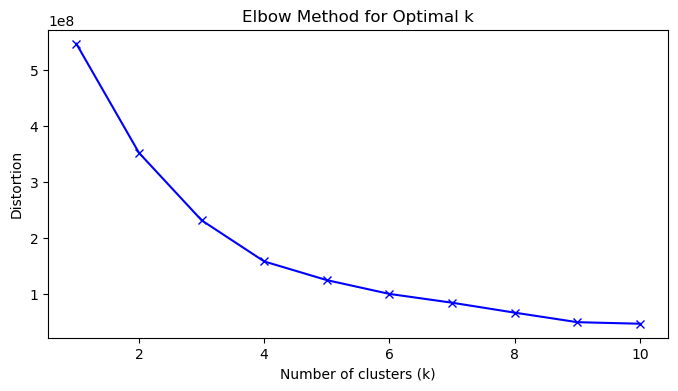

In [59]:
features = ["PULocationID", "DOLocationID", "total_amount"]
plot_elbow_method(dfTest[features])

In [55]:
df_selected = dfTest[features]

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_selected[features])
df_scaled = pd.DataFrame(scaler.fit_transform(df_selected), columns=df_selected.columns, index=df_selected.index)
#df_scaled = df_selected.copy()


kmeans = KMeans(n_clusters=4, random_state=42) 
df_selected['cluster'] = kmeans.fit_predict(df_scaled)


C:\Users\Guillaume dse\AppData\Local\Temp\ipykernel_22248\2543920050.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['cluster'] = kmeans.fit_predict(df_scaled)


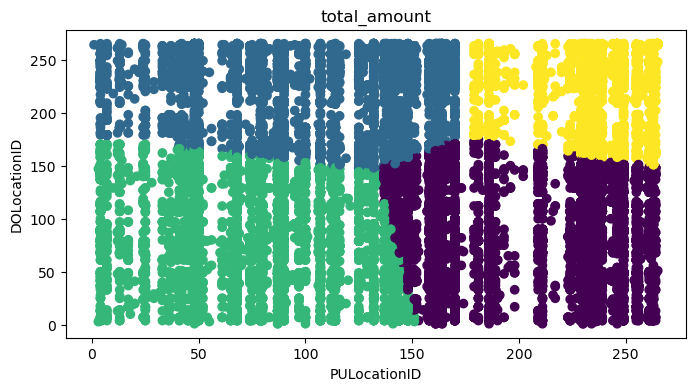

In [56]:
plt.figure(figsize=(8, 4))

plt.scatter(df_selected["PULocationID"], df_selected["DOLocationID"], c=df_selected['cluster'], cmap='viridis', marker='o')

plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title(features[-1])

plt.show()

Max tips per trip

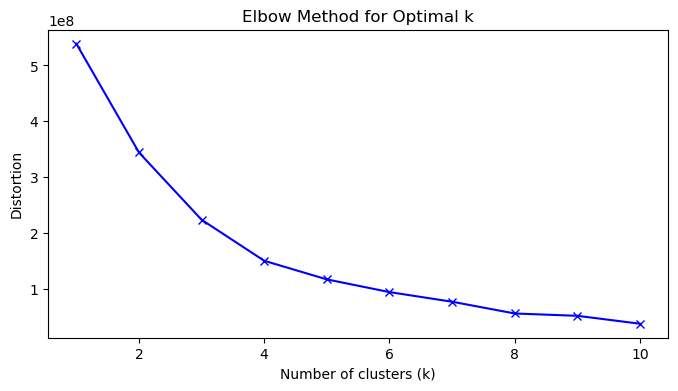

In [39]:
features = ["DOLocationID","PULocationID"]
plot_elbow_method(dfTest[features])

In [40]:
df_selected = dfTest[features]

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_selected[features])
df_scaled = pd.DataFrame(scaler.fit_transform(df_selected), columns=df_selected.columns, index=df_selected.index)
#df_scaled = df_selected.copy()


kmeans = KMeans(n_clusters=4, random_state=42) 
df_selected['cluster'] = kmeans.fit_predict(df_scaled)


C:\Users\Guillaume dse\AppData\Local\Temp\ipykernel_22248\2543920050.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['cluster'] = kmeans.fit_predict(df_scaled)


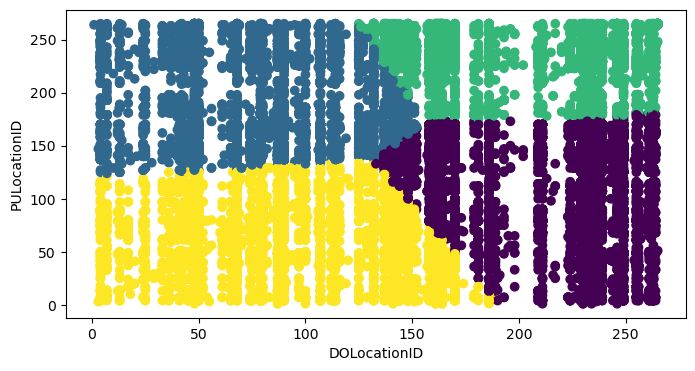

In [42]:
plt.figure(figsize=(8, 4))

plt.scatter(df_selected["PULocationID"], df_selected["DOLocationID"], c=df_selected['cluster'], cmap='viridis', marker='o')

plt.xlabel(features[0])
plt.ylabel(features[1])


plt.show()

In [29]:
dfTest.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'time_diff',
       'time_diff_seconds', 'trip_id'],
      dtype='object')

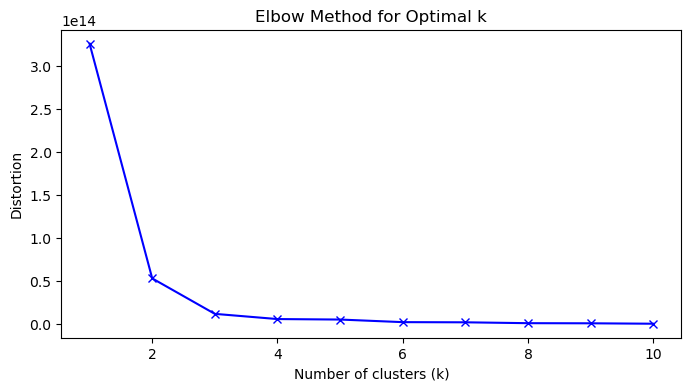

In [30]:
features = ["tip_amount",'PULocationID', 'DOLocationID', 'trip_id']
plot_elbow_method(dfTest[features])

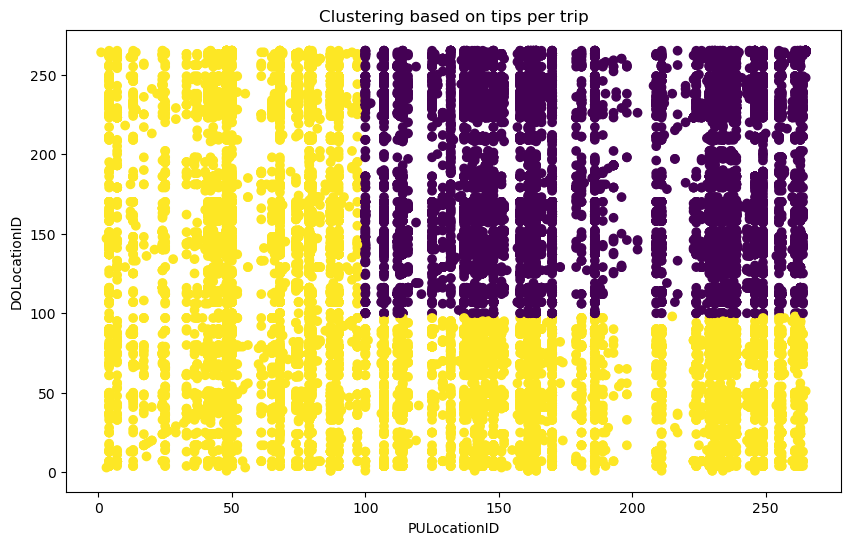

In [31]:
cluster_features = ["tip_amount", "trip_id"]
df_cluster = dfTest[cluster_features]

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cluster),columns=cluster_features,index=df_cluster.index)

kmeans = KMeans(n_clusters=2, random_state=42)
df_scaled['cluster'] = kmeans.fit_predict(df_scaled)

df_scaled['PULocationID'] = dfTest['PULocationID']
df_scaled['DOLocationID'] = dfTest['DOLocationID']

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_scaled["PULocationID"], df_scaled["DOLocationID"],c=df_scaled['cluster'], cmap='viridis', marker='o')

plt.xlabel("PULocationID")
plt.ylabel("DOLocationID")
plt.title("Clustering based on tips per trip")
plt.show()


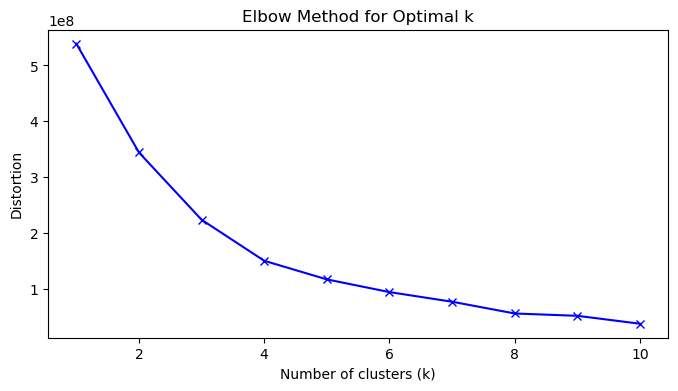

In [65]:
features = ["PULocationID", "DOLocationID"]
plot_elbow_method(dfTest[features])

In [ ]:
df_selected = dfTest[features]

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_selected), columns=df_selected.columns, index=df_selected.index)


kmeans = KMeans(n_clusters=4, random_state=42) 
df_selected['cluster'] = kmeans.fit_predict(df_scaled)


C:\Users\Guillaume dse\AppData\Local\Temp\ipykernel_22248\2543920050.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['cluster'] = kmeans.fit_predict(df_scaled)


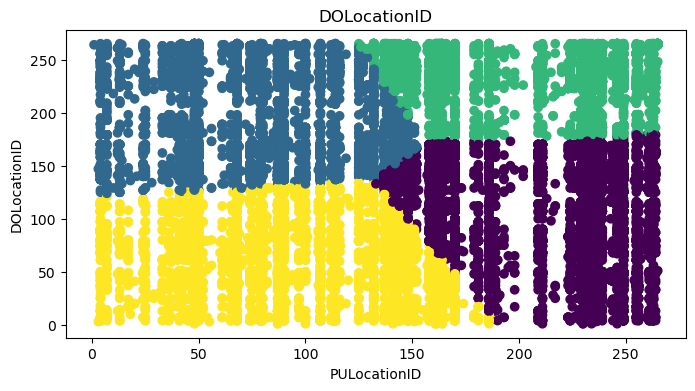

In [69]:
plt.figure(figsize=(8, 4))

plt.scatter(df_selected["PULocationID"], df_selected["DOLocationID"], c=df_selected['cluster'], cmap='viridis', marker='o')

plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title(features[-1])

plt.show()

In [109]:
dfTest.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,trip_id,pickup_hour,pickup_day,pickup_month,pickup_minute,dropoff_hour,dropoff_day,dropoff_month,dropoff_minute,cluster
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,...,238239,0,2,1,28,0,2,1,33,0
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,...,238239,0,2,1,35,0,2,1,43,0
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,...,238238,0,2,1,47,0,2,1,53,0
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,...,151238,0,2,1,55,1,2,1,0,0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,...,193193,0,2,1,1,0,2,1,4,0


In [ ]:

plt.figure(figsize=(8, 4))

plt.scatter(df_selected["trip_distance"], df_selected["passenger_count"], c=df_selected['cluster'], cmap='viridis', marker='o')

plt.xlabel(features[1]) 
plt.ylabel(features[0])  
plt.title("Clustering Based on Trip Distance and Passenger Count")

#plt.xticks(np.arange(df_selected["trip_distance"].min(), df_selected["trip_distance"].max() + 1, 1)) 

plt.show()


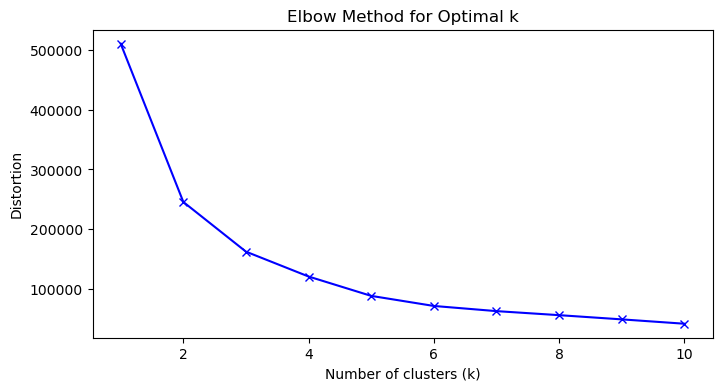

In [140]:
features = ["passenger_count", "trip_distance"]
plot_elbow_method(dfTest[features])

In [141]:
df_selected = dfTest[features]

df_selected = df_selected[df_selected["trip_distance"] > 0 ]

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_selected), columns=df_selected.columns)


kmeans = KMeans(n_clusters=3, random_state=5) 
df_selected['cluster'] = kmeans.fit_predict(df_scaled)


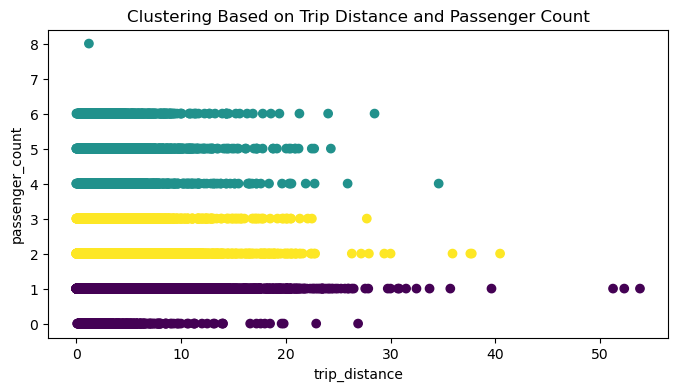

In [142]:

plt.figure(figsize=(8, 4))

plt.scatter(df_selected["trip_distance"], df_selected["passenger_count"], c=df_selected['cluster'], cmap='viridis', marker='o')

plt.xlabel(features[1]) 
plt.ylabel(features[0])  
plt.title("Clustering Based on Trip Distance and Passenger Count")

#plt.xticks(np.arange(df_selected["trip_distance"].min(), df_selected["trip_distance"].max() + 1, 1)) 

plt.show()


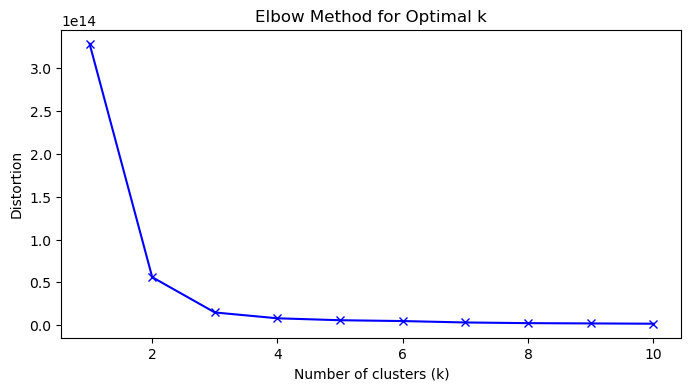

In [114]:
features = ['passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'time_diff',
       'time_diff_seconds', 'trip_id']
plot_elbow_method(dfTest[features])

In [116]:
df_selected = dfTest[features]

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_selected), columns=df_selected.columns, index=df_selected.index)


kmeans = KMeans(n_clusters=4, random_state=42) 
df_selected['cluster'] = kmeans.fit_predict(df_scaled)


C:\Users\Guillaume dse\AppData\Local\Temp\ipykernel_22248\1950162978.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['cluster'] = kmeans.fit_predict(df_scaled)


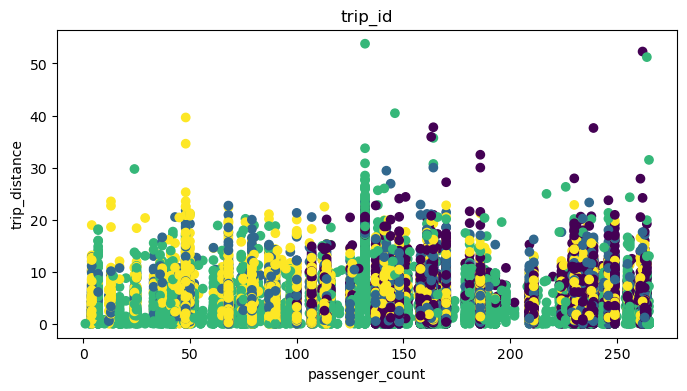

In [118]:
plt.figure(figsize=(8, 4))

plt.scatter(df_selected["PULocationID"], df_selected["trip_distance"], c=df_selected['cluster'], cmap='viridis', marker='o')

plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title(features[-1])

plt.show()

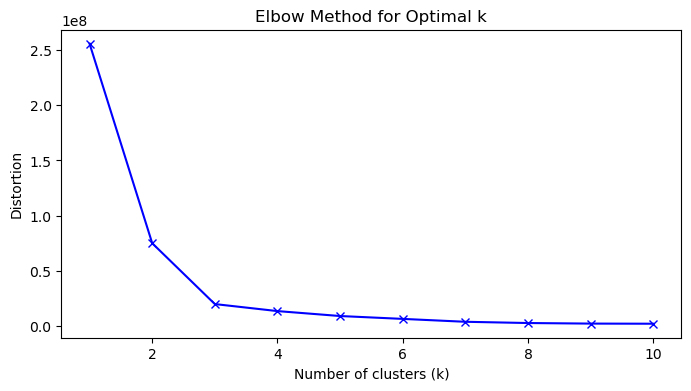

In [124]:
features = ["PULocationID", "trip_distance"]
plot_elbow_method(dfTest[features])

In [131]:
df_selected = dfTest[features]

df_selected = df_selected[df_selected["trip_distance"] > 0 ]

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_selected), columns=df_selected.columns)


kmeans = KMeans(n_clusters=3, random_state=5) 
df_selected['cluster'] = kmeans.fit_predict(df_scaled)


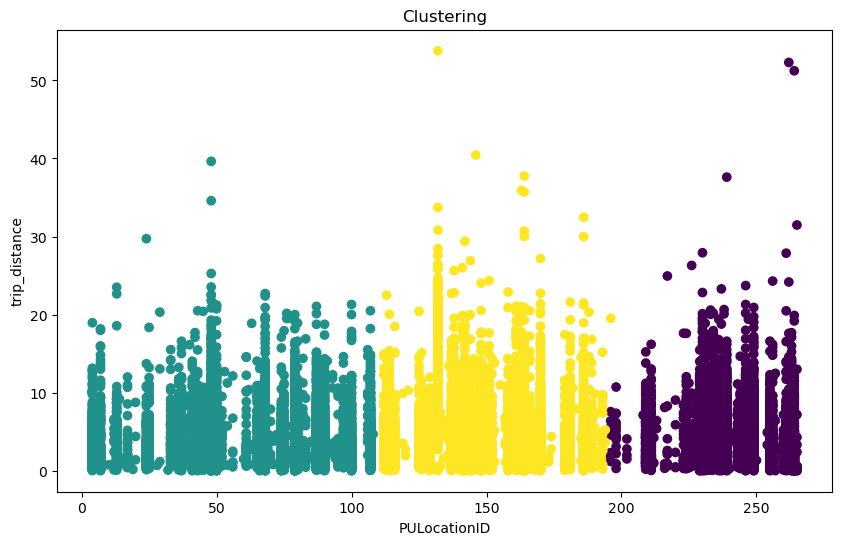

In [132]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_selected["PULocationID"], df_selected["trip_distance"],c=df_selected['cluster'], cmap='viridis', marker='o')

plt.xlabel("PULocationID")
plt.ylabel("trip_distance")
plt.title("Clustering")
plt.show()


C:\Users\Guillaume dse\AppData\Local\Temp\ipykernel_22248\975206938.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTipsCluster['payment_type_encoded'] = label_encoder.fit_transform(dfTipsCluster['payment_type'])
C:\Users\Guillaume dse\AppData\Local\Temp\ipykernel_22248\975206938.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTipsCluster['cluster'] = kmeans.fit_predict(df_scaled)


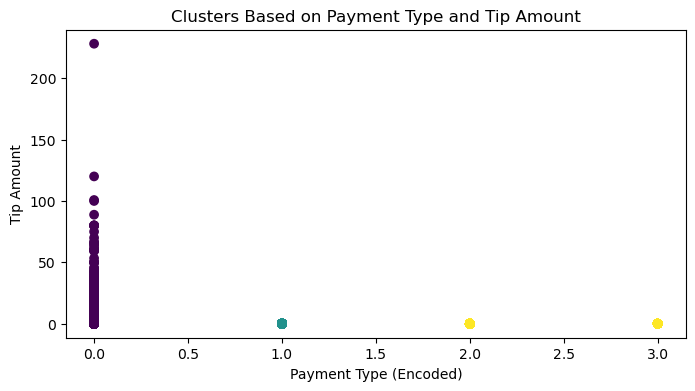

In [145]:
label_encoder = LabelEncoder()
dfTipsCluster = dfTest[dfTest["tip_amount"] > 0]
dfTipsCluster['payment_type_encoded'] = label_encoder.fit_transform(dfTipsCluster['payment_type'])

features = ['payment_type_encoded', 'tip_amount']
df_selected = dfTipsCluster[features]

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_selected)

kmeans = KMeans(n_clusters=3, random_state=42)
dfTipsCluster['cluster'] = kmeans.fit_predict(df_scaled)

plt.figure(figsize=(8, 4))

plt.scatter(dfTest['payment_type_encoded'], dfTest['tip_amount'], c=dfTest['cluster'], cmap='viridis', marker='o')

plt.xlabel("Payment Type (Encoded)")
plt.ylabel("Tip Amount")
plt.title("Clusters Based on Payment Type and Tip Amount")

plt.show()